In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [1]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [2]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpmemsvw_iGP2


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images.max()

255

In [7]:
masks.max()

True

In [7]:
masks.shape

(10000, 512, 512, 1)

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [7]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [8]:
RUNS = 10

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpy2ngz0y4GP2/unet_0.model
History saved to /tmp/tmpy2ngz0y4GP2/history_0.pickle
Testing the classifier...
94/94 [==============================] - 10s 104ms/step - loss: 0.5642 - dice_coeff: 0.5827
Model saved to /tmp/tmpy2ngz0y4GP2/cnnd_0.model
History saved to /tmp/tmpy2ngz0y4GP2/cnnd_history_0.pickle
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 0.1486 - accuracy: 0.9933
Found 305 machine labels.
Replacing 101 from 305 !
Removed: 81 Filled: 81
TOOK 2328.4135313034058 seconds
***
RUN: 1
Model saved to /tmp/tmpy2ngz0y4GP2/unet_1.model
History saved to /tmp/tmpy2ngz0y4GP2/history_1.pickle
Testing the classifier...
94/94 [==============================] - 9s 98ms/step - loss: 0.2867 - dice_coeff: 0.7786
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 2.7800 - accuracy: 0.8633
Found 226 machine labels.
Replacing 75 from 226 !
Removed: 66 Filled: 66
TOOK 2104.6525425910

In [10]:
R.classifier_scores

[[0.5642099976539612, 0.5826576948165894],
 [0.286675363779068, 0.778622567653656],
 [0.12322214990854263, 0.9131745100021362],
 [0.08164855092763901, 0.9533213376998901],
 [0.07500245422124863, 0.9594419598579407],
 [0.0762050673365593, 0.9623624086380005],
 [0.07507267594337463, 0.9652668833732605],
 [0.07804848253726959, 0.9660343527793884],
 [0.07775305956602097, 0.9656627774238586],
 [0.08373130112886429, 0.9647961854934692]]

In [11]:
R.discriminator_scores

[[0.14858856797218323, 0.9933333396911621],
 [2.7799570560455322, 0.8633333444595337],
 [4.39655065536499, 0.8166666626930237],
 [6.878868103027344, 0.7749999761581421],
 [7.277260780334473, 0.7483333349227905],
 [6.816073417663574, 0.7683333158493042],
 [8.151098251342773, 0.7183333039283752],
 [7.726363182067871, 0.7549999952316284],
 [4.726717472076416, 0.7950000166893005],
 [10.455708503723145, 0.6866666674613953]]

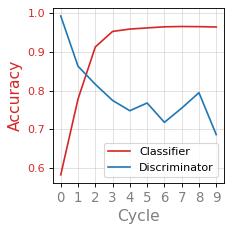

In [12]:
R.plot()